In [20]:
# Resources

# docs for binary relevance model: http://scikit.ml/api/skmultilearn.problem_transform.br.html
# https://www.youtube.com/watch?v=YyOuDi-zSiI
# https://www.youtube.com/watch?v=vnObmjMWVd0
# https://medium.com/@evertongomede/multi-label-classification-in-python-empowering-machine-learning-with-versatility-9dbae34aacdb#:~:text=scikit%2Dlearn%3A%20scikit%2Dlearn,to%20tackle%20multi%2Dlabel%20p

In [4]:
import pandas as pd
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Multi Label Pkgs

import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import GridSearchCV

In [6]:
df15 = pd.read_csv('../df_15.csv')

In [7]:
df15.head()

,binary_tox,capitalized letters,character count,cleaner_text,comment_text,compound,identity_hate,insult,lemmatized_text,lgbtq hate,...,neutral,obscene,pos,racial_ethnic slurs,severe_toxic,special characters,swear words,threat,toxic,word count
0,0,2,78,May not be a insult but still name calling Kep...,May not be a insult but still name calling Kep...,-0.2020,0,0,insult calling Kepp blocked .,0,...,1,0,0.10,0,0,1,0,0,0,17
1,0,2,56,is there any proof that Socialist Democrayc st...,is there any proof that Socialist Democrayc st...,0.0000,0,0,proof Socialist Democrayc exist .,0,...,1,0,0.00,0,0,1,0,0,0,9
2,1,2,82,You have the nerve to post these notices on my...,You have the nerve to post these notices on my...,-0.6115,0,0,spunk post note lecture foliate . truly misfor...,0,...,0,0,0.00,0,0,2,0,0,1,16
3,0,3,68,April 2008 Your unhelpful edits have been rve...,April 2008\n Your unhelpful edits have been rv...,0.0258,0,0,April 2008 unhelpful edits rverted . stop .,0,...,1,0,0.17,0,0,2,0,0,0,11
4,1,4,71,Hmmm... This says that I'm a possible sockpupp...,Hmmm... This says that I'm a possible sockpupp...,0.0000,0,0,Hmmm ... say 'm potential sockpuppet . 'm sock...,0,...,0,0,0.00,0,0,7,0,0,1,12


In [8]:
df15.columns

Index(['binary_tox', 'capitalized letters', 'character count', 'cleaner_text',
       'comment_text', 'compound', 'identity_hate', 'insult',
       'lemmatized_text', 'lgbtq hate', 'misogynist words', 'neg', 'neu',
       'neutral', 'obscene', 'pos', 'racial_ethnic slurs', 'severe_toxic',
       'special characters', 'swear words', 'threat', 'toxic', 'word count'],
      dtype='object')

In [9]:
df15.head()

,binary_tox,capitalized letters,character count,cleaner_text,comment_text,compound,identity_hate,insult,lemmatized_text,lgbtq hate,...,neutral,obscene,pos,racial_ethnic slurs,severe_toxic,special characters,swear words,threat,toxic,word count
0,0,2,78,May not be a insult but still name calling Kep...,May not be a insult but still name calling Kep...,-0.2020,0,0,insult calling Kepp blocked .,0,...,1,0,0.10,0,0,1,0,0,0,17
1,0,2,56,is there any proof that Socialist Democrayc st...,is there any proof that Socialist Democrayc st...,0.0000,0,0,proof Socialist Democrayc exist .,0,...,1,0,0.00,0,0,1,0,0,0,9
2,1,2,82,You have the nerve to post these notices on my...,You have the nerve to post these notices on my...,-0.6115,0,0,spunk post note lecture foliate . truly misfor...,0,...,0,0,0.00,0,0,2,0,0,1,16
3,0,3,68,April 2008 Your unhelpful edits have been rve...,April 2008\n Your unhelpful edits have been rv...,0.0258,0,0,April 2008 unhelpful edits rverted . stop .,0,...,1,0,0.17,0,0,2,0,0,0,11
4,1,4,71,Hmmm... This says that I'm a possible sockpupp...,Hmmm... This says that I'm a possible sockpupp...,0.0000,0,0,Hmmm ... say 'm potential sockpuppet . 'm sock...,0,...,0,0,0.00,0,0,7,0,0,1,12


In [10]:
#classifying different types of toxicity

In [11]:
df15.columns

Index(['binary_tox', 'capitalized letters', 'character count', 'cleaner_text',
       'comment_text', 'compound', 'identity_hate', 'insult',
       'lemmatized_text', 'lgbtq hate', 'misogynist words', 'neg', 'neu',
       'neutral', 'obscene', 'pos', 'racial_ethnic slurs', 'severe_toxic',
       'special characters', 'swear words', 'threat', 'toxic', 'word count'],
      dtype='object')

In [12]:
y = df15[['toxic', 'severe_toxic', 'obscene', 
           'threat', 'insult', 'identity_hate']]

X = df15['lemmatized_text']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .25,
                                                   random_state = 42)

In [14]:
classifier = MultinomialNB()  #  binary classifier

pipeline = Pipeline([
    ('tvec', TfidfVectorizer()),  
    ('binary_relevance', BinaryRelevance(classifier = classifier))
])

In [15]:
param_grid = {
    'tvec__max_features': [10000],
    'tvec__min_df': [7],
    'tvec__max_df': [.85],
    'tvec__ngram_range': [(1,2)],
    'binary_relevance__classifier__alpha': [0.01]   #found best alpha with gridsearch

}

In [16]:
gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='f1_micro',  # Choose an appropriate scoring metric - f1 micro good for multilabel, imbalanced data
    n_jobs=-1  # Number of CPU cores to use (-1 for all available cores)
)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('binary_relevance',
                                        BinaryRelevance(classifier=MultinomialNB(),
                                                        require_dense=[True,
                                                                       True]))]),
             n_jobs=-1,
             param_grid={'binary_relevance__classifier__alpha': [0.01],
                         'tvec__max_df': [0.85], 'tvec__max_features': [10000],
                         'tvec__min_df': [7], 'tvec__ngram_range': [(1, 2)]},
             scoring='f1_micro')

In [22]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.847213308979612, 0.7896873120865905)

In [17]:
# import sklearn.metrics
# sklearn.metrics.SCORERS.keys()

In [18]:
best_params = gs.best_params_
print(best_params)
best_score = gs.best_score_
print(best_score)

{'binary_relevance__classifier__alpha': 0.01, 'tvec__max_df': 0.85, 'tvec__max_features': 10000, 'tvec__min_df': 7, 'tvec__ngram_range': (1, 2)}
0.7773444451401985


In [19]:
gs_prediction = gs.predict(X_test)

In [20]:
# Accuracy
accuracy_score(y_test, gs_prediction)

0.8062885451420483

In [ ]:
f1_micro

In [21]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,gs_prediction)

0.04714723823004078

In [20]:
## pickle model for later use, if needed:

import pickle


# Pickle the model to a file
with open('15_binary_relevance_mnb.pkl', 'wb') as file:
    pickle.dump(gs, file)

Inspecting Predictions Vs Actuals:

In [21]:
# Predictions

gs_pred_proba = gs.predict_proba(X_test)


# Convert to Array  To See Result
gs_prediction.toarray()

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [22]:
X_test.head()

37182    OVERVIEW : Crunch ( AGT Crunch Acquisition , L...
33446    `` proposed lead paragraph , treat topic artic...
30542    Yes editing article : Pranic Healing behalf Co...
1763     homophile hombre know . Wuzzup ? like sadomaso...
17149        bonk jzg take_out editor_program stupid idiot
Name: lemmatized_text, dtype: object

In [23]:
y_test.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
37182,0,0,0,0,0,0
33446,0,0,0,0,0,0
30542,0,0,0,0,0,0
1763,1,0,0,0,0,0
17149,1,0,1,0,1,0


In [24]:
y_test_list = list(y_test.values)

In [25]:
y_test_list[:5]

[array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 0])]

In [26]:

df_X_test = pd.DataFrame(X_test)

df_X_test.head()

,lemmatized_text
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L..."
33446,"`` proposed lead paragraph , treat topic artic..."
30542,Yes editing article : Pranic Healing behalf Co...
1763,homophile hombre know . Wuzzup ? like sadomaso...
17149,bonk jzg take_out editor_program stupid idiot


In [27]:
df_y_test = pd.DataFrame(y_test)

df_y_test.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
37182,0,0,0,0,0,0
33446,0,0,0,0,0,0
30542,0,0,0,0,0,0
1763,1,0,0,0,0,0
17149,1,0,1,0,1,0


In [28]:
test_df = pd.concat([df_X_test, df_y_test], axis = 1)

test_df.head()

,lemmatized_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L...",0,0,0,0,0,0
33446,"`` proposed lead paragraph , treat topic artic...",0,0,0,0,0,0
30542,Yes editing article : Pranic Healing behalf Co...,0,0,0,0,0,0
1763,homophile hombre know . Wuzzup ? like sadomaso...,1,0,0,0,0,0
17149,bonk jzg take_out editor_program stupid idiot,1,0,1,0,1,0


In [29]:
test_df['predictions'] = list(gs_prediction.toarray())

In [30]:
test_df.head(10)

,lemmatized_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,predictions
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
33446,"`` proposed lead paragraph , treat topic artic...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
30542,Yes editing article : Pranic Healing behalf Co...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
1763,homophile hombre know . Wuzzup ? like sadomaso...,1,0,0,0,0,0,"[1, 0, 1, 0, 1, 0]"
17149,bonk jzg take_out editor_program stupid idiot,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]"
32304,thing wanted conribute Articles working contri...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
1731,think mucha lucha homosexual 've witnessed lif...,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]"
32767,Usman Naveed hello usman changeling like human .,1,0,0,0,1,0,"[1, 0, 1, 0, 1, 0]"
35034,`` `` '' considered reliable source '' '' —ful...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
24961,wary saying userpage . alternative explanation...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"


In [31]:
test_df['y_test_list'] = y_test_list

In [35]:
test_df.head()

,lemmatized_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,predictions,y_test_list
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
33446,"`` proposed lead paragraph , treat topic artic...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
30542,Yes editing article : Pranic Healing behalf Co...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
1763,homophile hombre know . Wuzzup ? like sadomaso...,1,0,0,0,0,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 0]"
17149,bonk jzg take_out editor_program stupid idiot,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]"


In [38]:
test_df['prediction_error'] = test_df.apply(lambda row: 1 if not np.array_equal(row['predictions'], row['y_test_list']) else 0, axis=1)


In [39]:
test_df.head(10)

,lemmatized_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,predictions,y_test_list,prediction_error
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0
33446,"`` proposed lead paragraph , treat topic artic...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0
30542,Yes editing article : Pranic Healing behalf Co...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0
1763,homophile hombre know . Wuzzup ? like sadomaso...,1,0,0,0,0,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 0]",1
17149,bonk jzg take_out editor_program stupid idiot,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]",0
32304,thing wanted conribute Articles working contri...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0
1731,think mucha lucha homosexual 've witnessed lif...,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]",0
32767,Usman Naveed hello usman changeling like human .,1,0,0,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 1, 0]",1
35034,`` `` '' considered reliable source '' '' —ful...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0
24961,wary saying userpage . alternative explanation...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0


In [40]:
test_df['prediction_error'].value_counts(normalize = True)

0    0.806289
1    0.193711
Name: prediction_error, dtype: float64

In [41]:
# Create a new column to store the count of differences
test_df['label_difference_count'] = test_df.apply(lambda row: sum(pred != true for pred, true in zip(row['predictions'], row['y_test_list'])), axis=1)


In [42]:
test_df.head(10)

,lemmatized_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,predictions,y_test_list,prediction_error,label_difference_count
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0
33446,"`` proposed lead paragraph , treat topic artic...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0
30542,Yes editing article : Pranic Healing behalf Co...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0
1763,homophile hombre know . Wuzzup ? like sadomaso...,1,0,0,0,0,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 0]",1,2
17149,bonk jzg take_out editor_program stupid idiot,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]",0,0
32304,thing wanted conribute Articles working contri...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0
1731,think mucha lucha homosexual 've witnessed lif...,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]",0,0
32767,Usman Naveed hello usman changeling like human .,1,0,0,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 1, 0]",1,1
35034,`` `` '' considered reliable source '' '' —ful...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0
24961,wary saying userpage . alternative explanation...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0


In [43]:
label_diff_value_counts = test_df['label_difference_count'].value_counts()

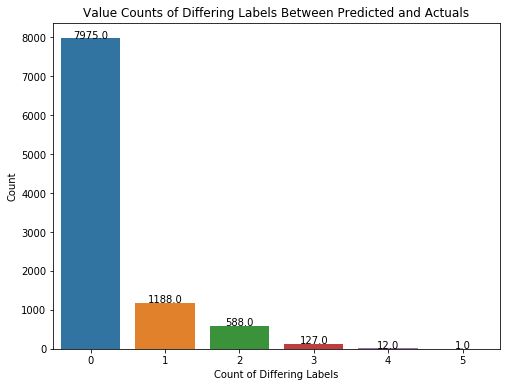

In [44]:
# Plot the value counts
# Create a bar plot using Seaborn

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_diff_value_counts.index, y=label_diff_value_counts.values)
plt.xlabel('Count of Differing Labels')
plt.ylabel('Count')
plt.title('Value Counts of Differing Labels Between Predicted and Actuals')

# Annotate the bars with value counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [45]:
#got help from chatgt to write this

# Define column names from y_test
column_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create a new column to store differing indexes and map them to column names
test_df['differing_indexes'] = test_df.apply(lambda row: [i for i, (pred, true) in enumerate(zip(row['predictions'], row['y_test_list'])) if pred != true], axis=1)
test_df['differing_columns'] = test_df['differing_indexes'].apply(lambda indexes: [column_names[i] for i in indexes])


In [46]:
test_df.head()

,lemmatized_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,predictions,y_test_list,prediction_error,label_difference_count,differing_indexes,differing_columns
37182,"OVERVIEW : Crunch ( AGT Crunch Acquisition , L...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,[],[]
33446,"`` proposed lead paragraph , treat topic artic...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,[],[]
30542,Yes editing article : Pranic Healing behalf Co...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,[],[]
1763,homophile hombre know . Wuzzup ? like sadomaso...,1,0,0,0,0,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 0]",1,2,"[2, 4]","[obscene, insult]"
17149,bonk jzg take_out editor_program stupid idiot,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]",0,0,[],[]


In [47]:
# https://www.w3schools.com/python/ref_func_isinstance.asp

def convert_list_to_string(lst):
    if isinstance(lst, list) and len(lst) > 0:
        return ', '.join(lst)
    else:
        return 'None'

In [48]:
test_df['differing_columns'] = test_df['differing_columns'].apply(convert_list_to_string)

In [49]:
differing_column_combos = test_df['differing_columns'].value_counts()[:10]

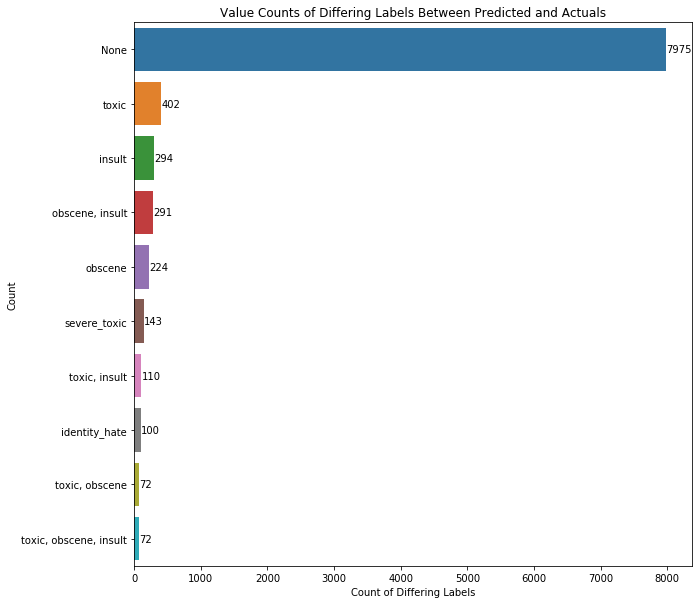

In [50]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(y=differing_column_combos.index, x=differing_column_combos.values, orient = 'h')
plt.xlabel('Count of Differing Labels')
plt.ylabel('Count')
plt.title('Value Counts of Differing Labels Between Predicted and Actuals')

# Annotate the bars with value counts
for i, v in enumerate(differing_column_combos):
    ax.text(v + 3, i, str(v), color='black', va='center')
plt.show()

In [18]:
# Metrics for multilabel outputs

# https://medium.com/@saugata.paul1010/a-detailed-case-study-on-multi-label-classification-with-machine-learning-algorithms-and-72031742c9aa